In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Titanic dataset
df = sns.load_dataset('titanic')

In [65]:
print("First five rows of the dataset:")
print(df.head())
print("Last five rows of the dataset:")
print(df.tail())

First five rows of the dataset:
   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  
Last five rows of the dataset:
     survived  pclass     sex   age  sibsp  parch   fare embarked   class  \
886         0       2    male  27.0      0      0  13.00        S  Second   
88

In [66]:
# Summary statistics
print("Summary statistics of the dataset:")
print(df.describe())

print("Concise summary of the dataframe (including data types and non-null counts):")
print(df.info())

Summary statistics of the dataset:
         survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200
Concise summary of the dataframe (including data types and non-null counts):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  ----

In [67]:
# Value Counts
print("\nDistribution of passenger classes:")
print(df['class'].value_counts())


Distribution of passenger classes:
class
Third     491
First     216
Second    184
Name: count, dtype: int64


In [68]:
# Missing Values Analysis
print("\nPercentage of missing values in each column:")
print(df.isnull().sum() / len(df) * 100)


Percentage of missing values in each column:
survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64


Text(0.5, 1.02, 'Survival Count by Sex and Class')

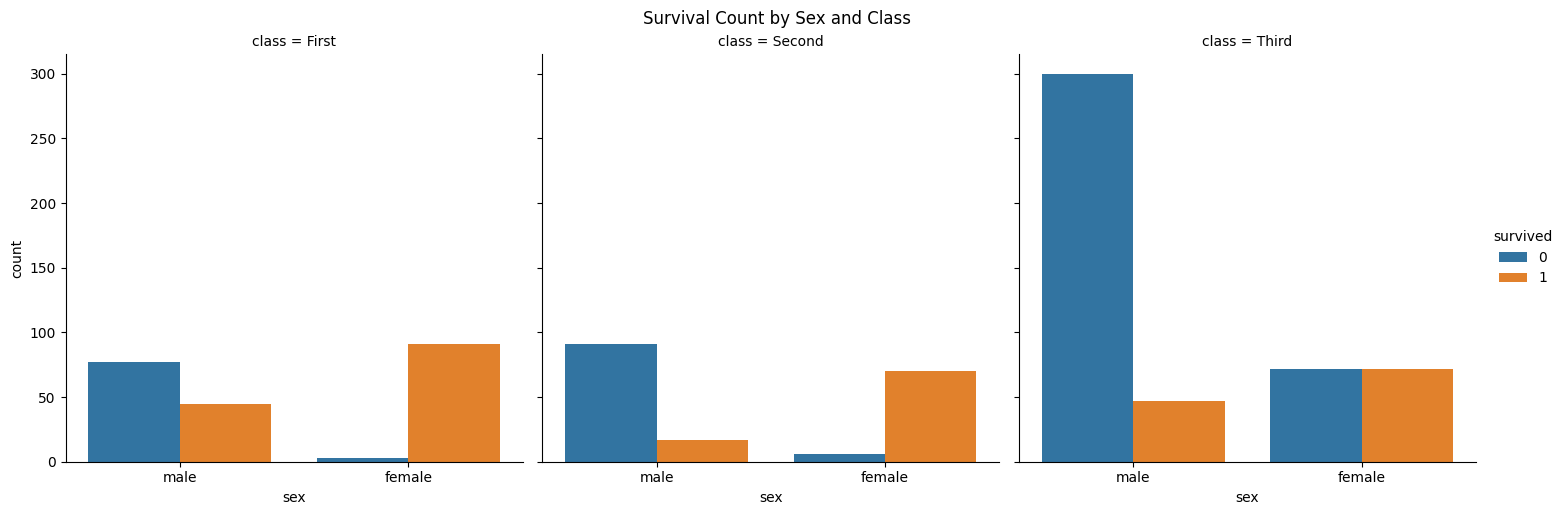

In [69]:
# Visualizations
sns.catplot(x='sex', col='class', data=df, kind='count', hue='survived')
plt.suptitle('Survival Count by Sex and Class', y=1.02)

Text(0.5, 1.0, 'Distribution of Survival (0 = No, 1 = Yes)')

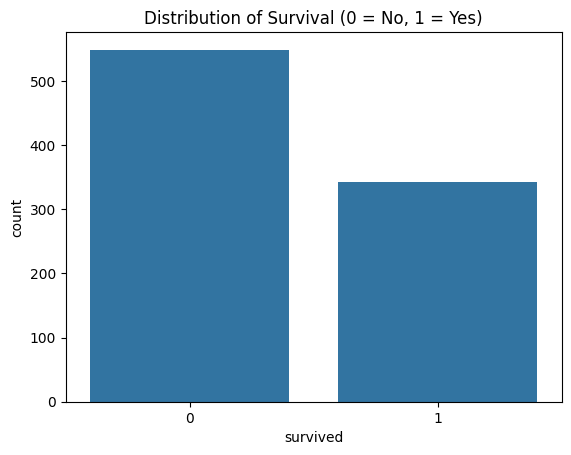

In [70]:
# Target Variable Exploration
sns.countplot(x='survived', data=df)
plt.title('Distribution of Survival (0 = No, 1 = Yes)')

In [71]:
# The 'age' column has missing values. We can fill them with the median age, which is robust to outliers. The 'deck' column has too many missing values, so we'll drop it. 'embark_town' and 'embarked' have very few missing values, so we'll fill them with the mode.

median_age = df['age'].median()
df['age'] = df['age'].fillna(median_age)

df.drop('deck', axis=1, inplace=True)

mode_embark_town = df['embark_town'].mode()[0]
df['embark_town'] = df['embark_town'].fillna(mode_embark_town)
df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])

print("\nMissing values after cleaning:")
print(df.isnull().sum())


Missing values after cleaning:
survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64


In [73]:
# Removing Duplicate Rows

print(f"\nNumber of duplicate rows before: {df.duplicated().sum()}")
df.drop_duplicates(inplace=True)
print(f"Number of duplicate rows after: {df.duplicated().sum()}")


Number of duplicate rows before: 116
Number of duplicate rows after: 0


Text(0.5, 1.0, 'Boxplot of Fare')

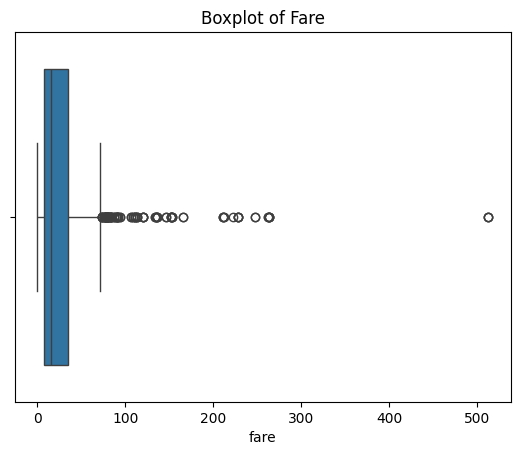

In [76]:
# Detect and Handling Outliers
sns.boxplot(x=df['fare'])
plt.title('Boxplot of Fare')

In [77]:
# Cap the outliers using the 99th percentile
upper_limit = df['fare'].quantile(0.99)
df['fare'] = np.where(df['fare'] > upper_limit, upper_limit, df['fare'])

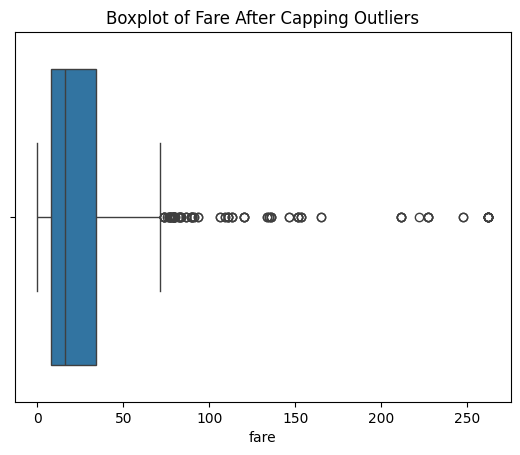

In [78]:
sns.boxplot(x=df['fare'])
plt.title('Boxplot of Fare After Capping Outliers')
plt.show()

In [79]:
df = pd.get_dummies(df, columns=['sex', 'embarked', 'class'], drop_first=True)
print("\nData after one-hot encoding:")
df


Data after one-hot encoding:


,survived,pclass,age,sibsp,parch,fare,who,adult_male,embark_town,alive,alone,sex_male,embarked_Q,embarked_S,class_Second,class_Third
0,0,3,22.0,1,0,7.2500,man,True,Southampton,no,False,True,False,True,False,True
1,1,1,38.0,1,0,71.2833,woman,False,Cherbourg,yes,False,False,False,False,False,False
2,1,3,26.0,0,0,7.9250,woman,False,Southampton,yes,True,False,False,True,False,True
3,1,1,35.0,1,0,53.1000,woman,False,Southampton,yes,False,False,False,True,False,False
4,0,3,35.0,0,0,8.0500,man,True,Southampton,no,True,True,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,39.0,0,5,29.1250,woman,False,Queenstown,no,False,False,True,False,False,True
887,1,1,19.0,0,0,30.0000,woman,False,Southampton,yes,True,False,False,True,False,False
888,0,3,28.0,1,2,23.4500,woman,False,Southampton,no,False,False,False,True,False,True
889,1,1,26.0,0,0,30.0000,man,True,Cherbourg,yes,True,True,False,False,False,False


In [80]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['age', 'fare']] = scaler.fit_transform(df[['age', 'fare']])
print("\nData after feature scaling:")
df


Data after feature scaling:


,survived,pclass,age,sibsp,parch,fare,who,adult_male,embark_town,alive,alone,sex_male,embarked_Q,embarked_S,class_Second,class_Third
0,0,3,-0.551060,1,0,-0.587536,man,True,Southampton,no,False,True,False,True,False,True
1,1,1,0.611945,1,0,0.823763,woman,False,Cherbourg,yes,False,False,False,False,False,False
2,1,3,-0.260308,0,0,-0.572659,woman,False,Southampton,yes,True,False,False,True,False,True
3,1,1,0.393881,1,0,0.423002,woman,False,Southampton,yes,False,False,False,True,False,False
4,0,3,0.393881,0,0,-0.569904,man,True,Southampton,no,True,True,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,0.684632,0,5,-0.105409,woman,False,Queenstown,no,False,False,True,False,False,True
887,1,1,-0.769123,0,0,-0.086124,woman,False,Southampton,yes,True,False,False,True,False,False
888,0,3,-0.114933,1,2,-0.230487,woman,False,Southampton,no,False,False,False,True,False,True
889,1,1,-0.260308,0,0,-0.086124,man,True,Cherbourg,yes,True,True,False,False,False,False


In [82]:
# Feature Engineering
df['family_size'] = df['sibsp'] + df['parch'] + 1
df

,survived,pclass,age,sibsp,parch,fare,who,adult_male,embark_town,alive,alone,sex_male,embarked_Q,embarked_S,class_Second,class_Third,family_size
0,0,3,-0.551060,1,0,-0.587536,man,True,Southampton,no,False,True,False,True,False,True,2
1,1,1,0.611945,1,0,0.823763,woman,False,Cherbourg,yes,False,False,False,False,False,False,2
2,1,3,-0.260308,0,0,-0.572659,woman,False,Southampton,yes,True,False,False,True,False,True,1
3,1,1,0.393881,1,0,0.423002,woman,False,Southampton,yes,False,False,False,True,False,False,2
4,0,3,0.393881,0,0,-0.569904,man,True,Southampton,no,True,True,False,True,False,True,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,0.684632,0,5,-0.105409,woman,False,Queenstown,no,False,False,True,False,False,True,6
887,1,1,-0.769123,0,0,-0.086124,woman,False,Southampton,yes,True,False,False,True,False,False,1
888,0,3,-0.114933,1,2,-0.230487,woman,False,Southampton,no,False,False,False,True,False,True,4
889,1,1,-0.260308,0,0,-0.086124,man,True,Cherbourg,yes,True,True,False,False,False,False,1


In [83]:
df.drop(['who', 'adult_male', 'embark_town', 'alive', 'pclass', 'sibsp', 'parch'], axis=1, inplace=True)

print("\nFinal dataframe columns ready for modeling:")
df.columns


Final dataframe columns ready for modeling:


Index(['survived', 'age', 'fare', 'alone', 'sex_male', 'embarked_Q',
       'embarked_S', 'class_Second', 'class_Third', 'family_size'],
      dtype='object')

In [84]:
from sklearn.model_selection import train_test_split

X = df.drop('survived', axis=1)
y = df['survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"\nTraining set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")


Training set shape: (620, 9)
Testing set shape: (155, 9)
